# Gradient Boosted Trees

__Group: Iñigo Martiarena y Carlos Rodríguez-Viña__

__Lending Club Loan Status Analysis__

## Import Libraries

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib notebook
import matplotlib
import matplotlib.pyplot as plt
import xgboost as xgb
import pickle
import seaborn as sns


from numpy import genfromtxt
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, auc, confusion_matrix, classification_report,balanced_accuracy_score, recall_score, precision_score
from sklearn.svm import SVC
import scikitplot as skplt
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.feature_selection import RFE
from sklearn import model_selection, metrics, linear_model
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline

from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, roc_curve, auc, confusion_matrix, classification_report, ConfusionMatrixDisplay
import scikitplot as skplt
import matplotlib.pyplot as plt
import matplotlib.pyplot as pltimport 
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression

from matplotlib import pyplot
import warnings
warnings.filterwarnings("ignore")
import sklearn.metrics as skm

pd.set_option('display.max_columns', None)

## Load Sample

We load the sample we have created in our notebook called "Sample"

In [5]:
X_ada = pd.read_csv('../data/X_ada.csv', engine = 'python')

In [6]:
y_ada = pd.read_csv('../data/y_ada.csv', engine = 'python')

In [7]:
X_test = pd.read_csv('../data/X_test.csv', engine = 'python')

In [8]:
y_test = pd.read_csv('../data/y_test.csv', engine = 'python')

### Standarization of the data


Due to having 58 variables in our dataset, we need to proceed to standarize our data, to ensure uniformity to certain practices within the industry.

In [9]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_ada= scaler.fit_transform(X_ada)
X_test= scaler.fit_transform(X_test)

## Model

We use the python function GradientBoostingClassifier, with a number of estimators at 200, a learning rate of 0.1, a random state 0f 40 and a loss of deviance for classification,

In [10]:
import xgboost as xgb
from sklearn import metrics

We proceed to apply the parameters selected into the model.

In [11]:
xgbmodel = xgb.XGBClassifier(max_depth=50, min_child_weight=2, n_estimators= 200, n_jobs=-1, learning_rate= 0.15)

In [12]:
xgbmodel.fit(X_ada, y_ada)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=50,
              min_child_weight=2, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

We proceed with the prediction base on the model we just built, and to calculate the following indicators:

 - Confusion Matrix 
 - Accuracy score. 
 - Recall Score.
 - Precision.
 - Roc Auc score.
 - F1 score
 


In [13]:
y_xgb = xgbmodel.predict(X_test)

### Confusion Matrix

In [14]:
ConfusionMatrix = confusion_matrix(y_test, y_xgb)
ConfusionMatrix

array([[14957,  5479],
       [ 6702, 55730]], dtype=int64)

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt


ConfusionMatrixDisplay(ConfusionMatrix)


According to our confussion Matrix we can interpretate the following:

 - 18.298 True Negatives. We have predicted "Charged Off" and in real they are "Charged Off".
 - 732 False Positives. We have predicted "Fully Paid" in reality "Charged Off".
 - 5.369 Flase Negatives. We have predicted "Charge Off" in reality "Full Paid".
 - 60.943 True Postives. We have predicted "Fully Paid" and in real they are "Fully Paid".
 

Of a total sample of 81.890 observations our model has predicted wrong 6.101, which is a 7% of the total

### Accuracy Score

In [16]:
accuracy_score(y_test, y_xgb)

0.8530071921610272

With this model we were able to obtain a 92,77% of accuracy, which means if we have 100 observation we are able to predict altmost 97% right. The issue with this score is when our model is imbalanced, meaning this score can deceive us into believing that a bad model is a good model. So to be certain we are going to use the balanced_accuracy.

In [19]:
balanced_accuracy_score(y_test, y_xgb, sample_weight=None, adjusted=False)

0.8122729500728305

We can see that our score has drop down to 93%, but still is a pretty great model.

### Recall Score & Precision Score

In [22]:
recall_score(y_test, y_xgb)

0.8926512045105074

The ratio is number of true positives/(true positives + false negatives), it informs us about the quantity that our model can predict being 1 the best value and 0 the worst values, in our case we have obtain an outstanding result.

Having a high recall score means that that the classifier is returning accurate results (high precision), as well as returning a majority of all positive results (high recall).

We measure the quality of our model, the formula is TruePositive/(TruePositives+FalsePositives)

In [23]:
precision_score(y_test, y_xgb)

0.910487019882697

The precision is intuitively the ability of the classifier not to label as positive a sample that is negative being best value 1 and worst value 0.

We have obtain a rather unusual Recall & Precision score, normally this scores have an inverse correlation, so how is it possible to have obtain a rather great scores, several reasons:

 - Imbalanced Sample.
 - We have missed important variables in our selection.
 - Our model is so train that is bias towards certain results.
 - We have created a great model

<IPython.core.display.Javascript object>


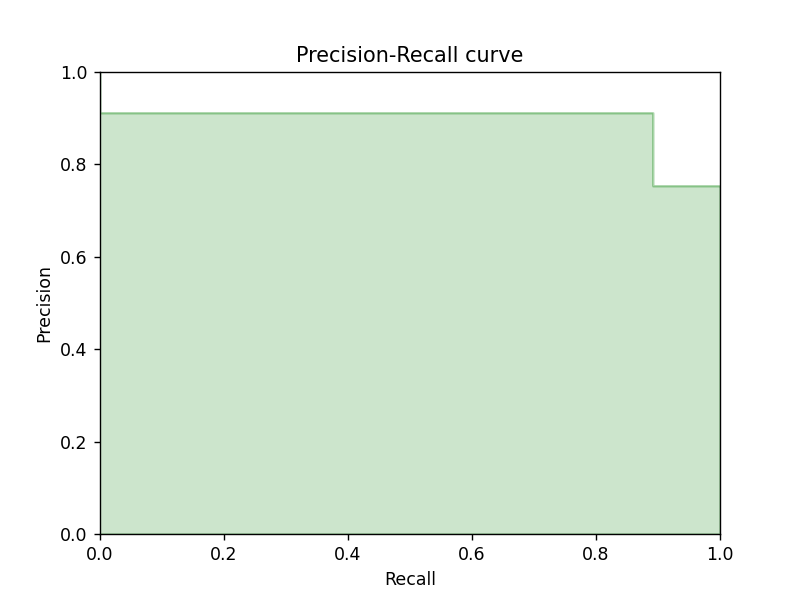

In [24]:
#Precision-Recall
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, _= precision_recall_curve(y_test, y_xgb)
plt.step(recall, precision, color='g', alpha=0.2, where='post')
plt.fill_between(recall, precision, alpha=0.2, color='g', step='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve')
plt.show()


We can see that the precision-recall curve is quite good for our model, that is because it is because we have worked with a balance sample, this metric is best for imbalanced datasets.

#### F1 Score

What if you want to balance the two objectives: high precision and high recall? Or, as a pirate captain, you want to optimize towards capturing treasure and avoiding mutiny? We calculate the F1-score as the harmonic mean of precision and recall to accomplish just that.

In [25]:
from sklearn.metrics import f1_score

def f1score (a, b):
    return (precision_score(y_test, y_xgb)*recall_score(y_test, y_xgb))/(precision_score(y_test, y_xgb)+recall_score(y_test, y_xgb))


In [26]:
f1score(y_test, y_xgb)

0.4507404501742949

Our f1 score show us that the mean between the precision score and the recall score, being a 45% we consider is a good result and our model focueses both in recall and precision, so if we wanted to increase one over the other there would not be any inconvineance.

### ROC_AUC

The ROC  is created by  the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings. The true-positive rate is also known as sensitivity, recall or probability of detection in machine learning. 



In [27]:
roc_auc_score(y_test, y_xgb)

0.8122729500728305

<IPython.core.display.Javascript object>


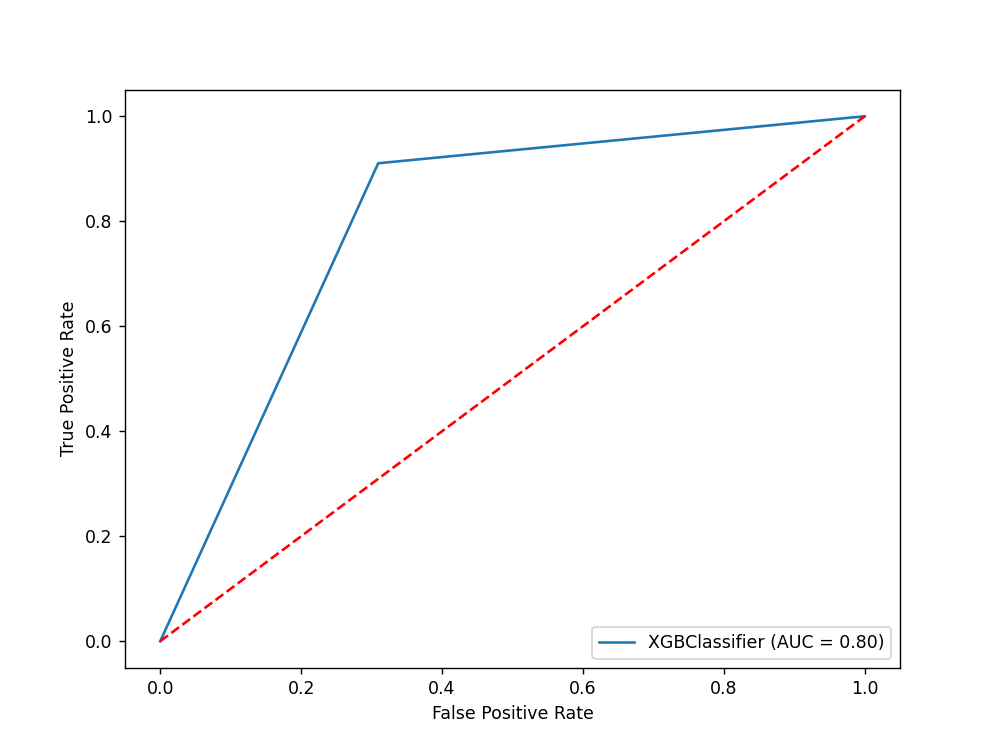

In [28]:
metrics.plot_roc_curve(xgbmodel, y_test, y_xgb)
plt.plot([0, 1], [0, 1], 'r--')

The roc curve shows us in a simple way the probability that our model clasifies a random observation into a TP rahter that FP in diferent thresholds. Our AUC is 80%, which means that are predictions are 80% correct. However, in this particular case we want to identify as much False positives as possible, as they are people who are not going to receive the loan, when in reality they should recieve it.

### Cumulative Gains Curve

The cumulative gains chart shows the percentage of the overall number of cases in a given category "gained" by targeting a percentage of the total number of cases. 

<IPython.core.display.Javascript object>


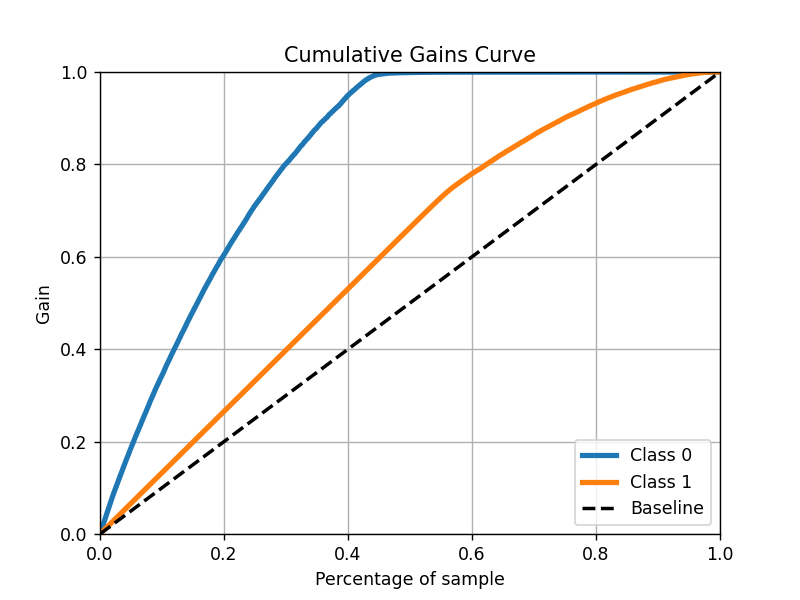

In [29]:
predicted_probabilities = xgbmodel.predict_proba(X_test)
skplt.metrics.plot_cumulative_gain(y_test, predicted_probabilities)
plt.show()

According to our curve if we analize a 60% of our sample we are going to able to predict 80% of our targets.

### IMPORTANT FEATURES

In [30]:
import eli5
eli5.show_weights(xgbmodel)

Weight,Feature
0.2980,f11
0.1488,f12
0.1241,f4
0.0719,f14
0.0671,f15
0.0668,f13
0.0571,f16
0.0434,f25
0.0208,f17
0.0156,f23


We dont have the names, but from this information we can conclude that the features number 11,12 and 4 are the ones according to our model that have the bigger impact in our predictions.

### Classification Report

We uild a text report showing the main classification metrics.

In [19]:
classif = classification_report(y_test, y_xgb)
print(classif)

              precision    recall  f1-score   support

           0       0.69      0.73      0.71     20436
           1       0.91      0.89      0.90     62432

    accuracy                           0.85     82868
   macro avg       0.80      0.81      0.81     82868
weighted avg       0.86      0.85      0.85     82868



Is a breef summary of what we have shown above.

### Hyperparameter

By utilizing weak learners (aka “stumps”), boosting algos like AdaBoost (documentation) and Gradient Boosting (documentation) focus on what the model misclassifies. By overweighting these misclassified data points, the model focuses on what it got wrong in order to learn how to get them right.
Similar to Decision Trees and Random Forests, we will focus on the bias-variance tradeoff usual suspects.

- N_estimators is the maximum number of estimators at which boosting is terminated. If a perfect fit is reached, the algo is stopped. The default here is 50. Bias-Variance Tradeoff: the higher the number of estimators in your model the lower the bias.

Other Important Parameters

- Learning_rate is the rate at which we are adjusting the weights of our model with respect to the loss gradient. In layman’s terms: the lower the learning_rate, the slower we travel along the slope of the loss function. Important note: there is a trade-off between learning_rate and n_estimators as a tiny learning_rate and a large n_estimators will not necessarily improve results relative to the large computational costs.

- Base_estimator (AdaBoost) / Loss (Gradient Boosting) is the base estimator from which the boosted ensemble is built. For AdaBoost the default value is None, which equates to a Decision Tree Classifier with max depth of 1 (a stump). For Gradient Boosting the default value is deviance, which equates to Logistic Regression. If “exponential” is passed, the AdaBoost algorithm is used.



In [57]:
import xgboost as xgb
model=xgb.XGBClassifier()
param = {
    "max_depth": [10,20,40,50],
    "min_child_weight": [1,3,6],
    "n_estimators": [200],
    "learning_rate": [0.001, 0.01, 0.1, 0.2, 0.5]
}

grsearch = GridSearchCV(model, param_grid=param, cv= 4, verbose=10, n_jobs=-1)

In [59]:
grsearch.fit(X_ada, y_ada)

Fitting 4 folds for each of 60 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed: 15.7min
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed: 16.1min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed: 52.8min
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed: 92.7min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 140.9min
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed: 154.0min
[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed: 201.5min
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed: 249.3min
[Parallel(n_jobs=-1)]: Done  89 tasks      | elapsed: 306.2min
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed: 328.0min
[Parallel(n_jobs=-1)]: Done 121 tasks      | elapsed: 413.1min
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed: 479.3min
[Parallel(n_jobs=-1)]: Done 157 tasks      | elapsed: 523.6min
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed: 581.0min
[Parallel(n_jobs=-1)]: Done 197 tasks      | 

GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [60]:
grsearch.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [72]:
grsearch.best_score_

0.9706727305600054

Comparing both models, we can see that the hyperparameter model has improve by 0.01% in all parameters.

So we have built a robust model.

In [104]:
pickle.dump(xgbmodel, open("xgbmodel", "wb"))

### Conclusion

After reviewing several of the results we have concluded the following:

    1) Our dataset is imbalance so the results we have obtain are normal because they are biased.
    2) Our model is so train that the bias affects our results.
    3) During the selection of the variables we have add or remove important variable that affect the results.
    4) We have built a very robust and precise model.

### References

To built our model we have search many sources of informaction through the internet.

https://towardsdatascience.com/dont-sweat-the-solver-stuff-aea7cddc3451 # parameters

https://scikit-learn.org/stable/modules/naive_bayes.html # naive model

https://towardsdatascience.com/tagged/scikit-learn # sk

https://medium.com/vickdata/a-simple-guide-to-scikit-learn-pipelines-4ac0d974bdcf # pipelines

https://medium.com/@benfenison/gridsearching-a-random-forest-classifier-fc225609699c # rf

https://medium.com/fintechexplained/how-to-save-trained-machine-learning-models-649c3ad1c018 # pickle

https://machinelearningmastery.com/rfe-feature-selection-in-python/ # feature engineering

https://towardsdatascience.com/beyond-accuracy-precision-and-recall-3da06bea9f6c # precision and recall

https://towardsdatascience.com/meaningful-metrics-cumulative-gains-and-lyft-charts-7aac02fc5c14 # cumulative gain

https://towardsdatascience.com/evaluate-model-performance-with-cumulative-gains-and-lift-curves-1f3f8f79da01 # cumulative gain

https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/#:~:text=true%20positives%20(TP)%3A%20These,they%20do%20have%20the%20disease.&text=false%20positives%20(FP)%3A%20We,actually%20do%20have%20the%20disease. # confusion matrix


https://towardsdatascience.com/beyond-accuracy-precision-and-recall-3da06bea9f6c# roc curve

